In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Database connection
DB = './Database/stock_db.db'
conn = sqlite3.connect(DB)
print("Connected to SQLite")

Connected to SQLite


In [3]:
'''
# Creating a cursor object
cur = conn.cursor()

# Ejecuto la query para traerme los datos
cur.execute('SELECT * FROM rendimiento_diario_por_accion')

# Fetch all rows
rows = cur.fetchall()

# Fetch column names from the cursor description
columns = [desc[0] for desc in cur.description]

rendimiento_diario_por_accion = pd.DataFrame(rows, columns=columns)
'''

"\n# Creating a cursor object\ncur = conn.cursor()\n\n# Ejecuto la query para traerme los datos\ncur.execute('SELECT * FROM rendimiento_diario_por_accion')\n\n# Fetch all rows\nrows = cur.fetchall()\n\n# Fetch column names from the cursor description\ncolumns = [desc[0] for desc in cur.description]\n\nrendimiento_diario_por_accion = pd.DataFrame(rows, columns=columns)\n"

In [4]:
rendimiento_diario_por_accion = pd.read_sql_query('SELECT * FROM rendimiento_diario_por_accion', conn)

In [5]:
rendimiento_diario_por_accion

,Date,Empresa,Close,Close_anterior,Rendimiento_Diario
0,2019-05-30,Alphabet,56.070499,NaN,NaN
1,2019-05-31,Alphabet,55.325001,56.070499,-1.33
2,2019-06-03,Alphabet,51.937000,55.325001,-6.12
3,2019-06-04,Alphabet,52.724499,51.937000,1.52
4,2019-06-05,Alphabet,52.231998,52.724499,-0.93
...,...,...,...,...,...
6280,2024-05-20,Tesla,174.949997,177.460007,-1.41
6281,2024-05-21,Tesla,186.600006,174.949997,6.66
6282,2024-05-22,Tesla,180.110001,186.600006,-3.48
6283,2024-05-23,Tesla,173.740005,180.110001,-3.54


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_2515/1815831229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Empresa', y='Rendimiento_Diario', data=rendimiento_diario_por_accion, palette='bright', linewidth=2)


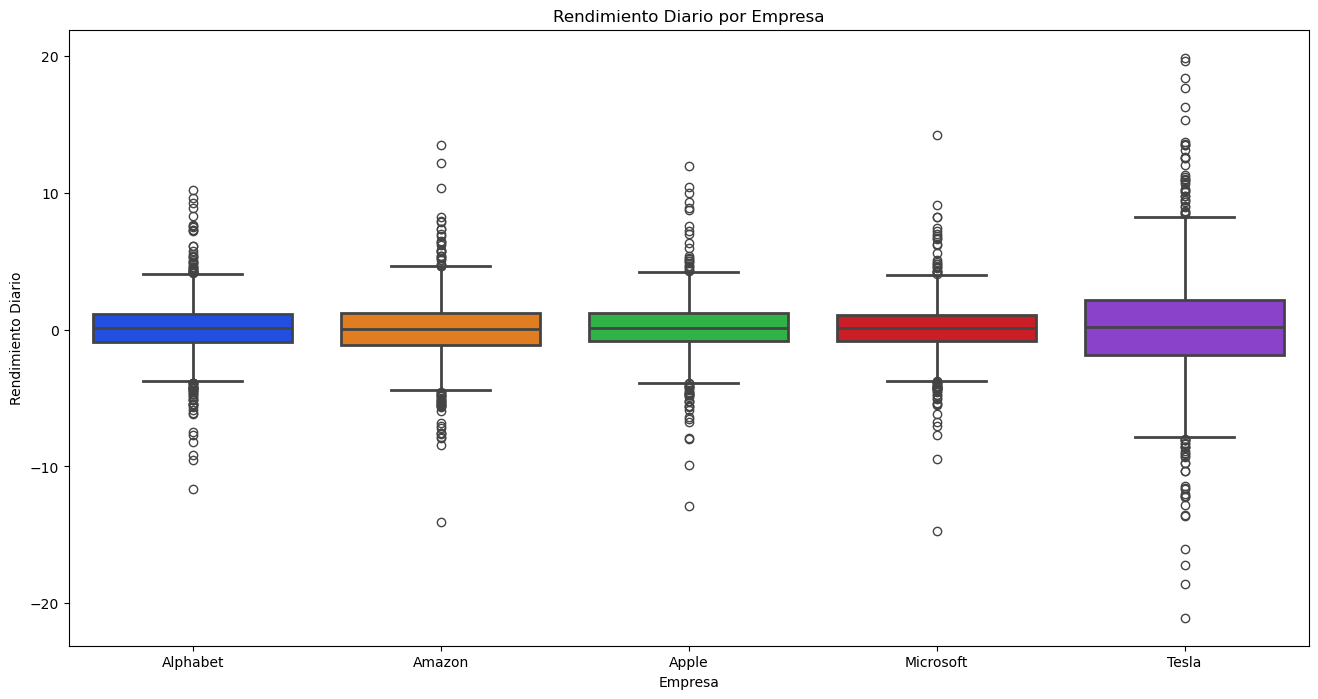

In [6]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Empresa', y='Rendimiento_Diario', data=rendimiento_diario_por_accion, palette='bright', linewidth=2)
plt.grid(False)
plt.xlabel('Empresa')
plt.ylabel('Rendimiento Diario')
plt.title('Rendimiento Diario por Empresa')
plt.show()


---

Basándonos en el análisis realizado en el notebook `visualizacion_datos.ipynb`, vamos a presentar un informe breve con los principales aprendizajes y conclusiones del análisis de datos:

### Principales Aprendizajes en Términos de Análisis de Datos:

1. **_Interacción con APIs para Extracción de Datos_**: Al haber utilizado la librería `yfinance` para extraer datos históricos de Yahoo Finance, pudimos ver un ejemplo práctico de cómo las APIs pueden ser una fuente valiosa de datos en tiempo real y cómo pueden ser integradas en un flujo de análisis de datos.

2. **_Implementación de Almacenamiento de Datos con SQLite_**: La inserción de datos financieros extraídos en una base de datos SQLite nos permitió ver la importancia de los sistemas de gestión de bases de datos en el manejo y almacenamiento eficiente de grandes volúmenes de datos para análisis posterior.

3. **_Análisis Exploratorio de Datos (EDA) en SQL_**: Habiendo hecho el EDA usando SQL para crear vistas y generar estadísticas descriptivas nos sirvió como modo de repaso y refuerzo de lo que vimos hasta el primer parcial, y nos permitió darnos cuenta de cómo SQL puede ser una herramienta poderosa para el análisis de datos (sobre todo para la comprendensión inicial de los mismos, permitiendo preguntas y respuestas sobre tendencias y patrones).


### Principales Conclusiones del Análisis Realizado:

1. **_Comportamiento del Mercado por Empresa y Tiempo_**: El análisis detallado que incluye vistas de rendimiento diario y comparaciones del precio de cierre y volumen de transacciones por empresa, año y mes, proporciona insights sobre cómo diferentes empresas y períodos temporales muestran variaciones en la actividad del mercado.

2. **_Identificación de Tendencias y Anomalías_**: El uso de esta ultima visualización (boxplots del rendimiento diario por empresa), nos permitió identificar rápidamente las tendencias en los rendimientos de las acciones y detectar anomalías o días con comportamientos atípicos, lo cual es crucial para la toma de decisiones en inversión.

3. **_Relevancia de Datos Completos_**: La revisión de la cantidad de días con datos faltantes y su impacto en el análisis subraya la importancia de contar con datos completos y precisos para realizar un análisis fiable y robusto.

